In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [33]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Вычисление "скорректировнного R2"
    # Сначала вычислим коэффициент детерминации R2
    r2 = model.score(X_test, y_test)
    # Размер тестовой выборки
    n = X_test.shape[0]
    # Количество признаков
    p = X_test.shape[1]
    # Вычислим "Скорректировнный R2"
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(), 4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [49]:
dtf = pd.read_csv('/content/coffee_shop_revenue.csv')
dtf.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


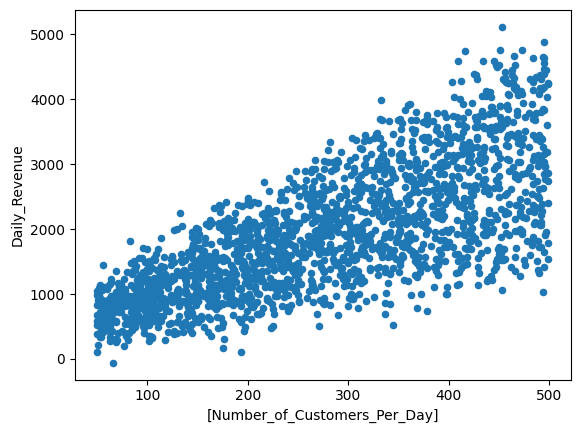

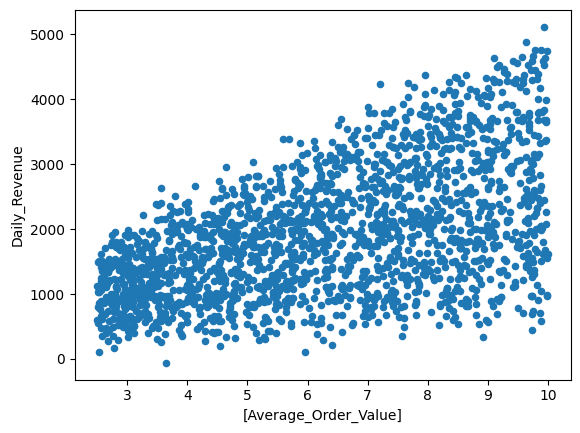

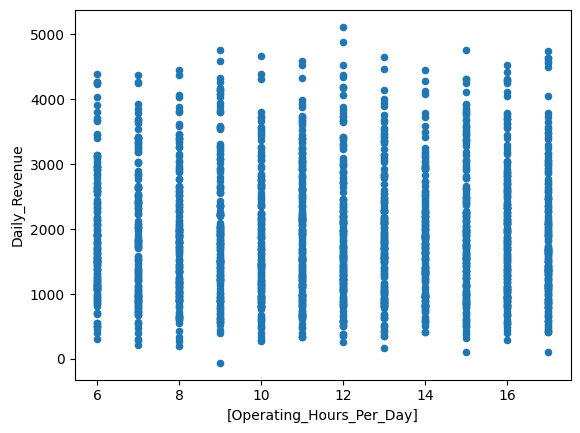

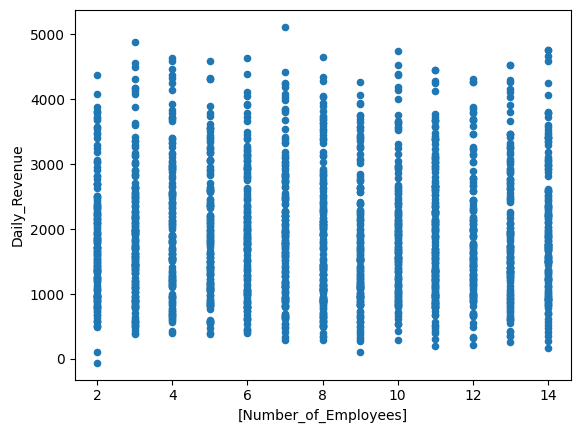

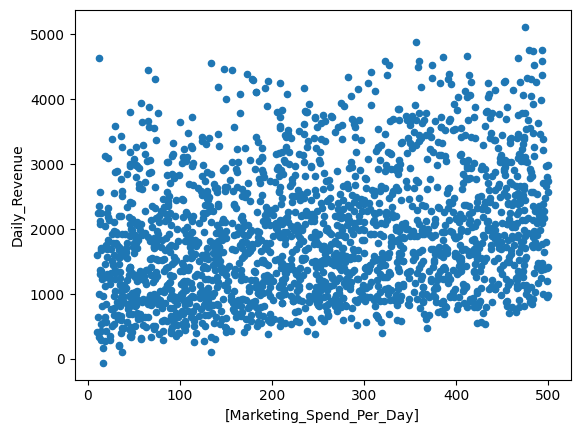

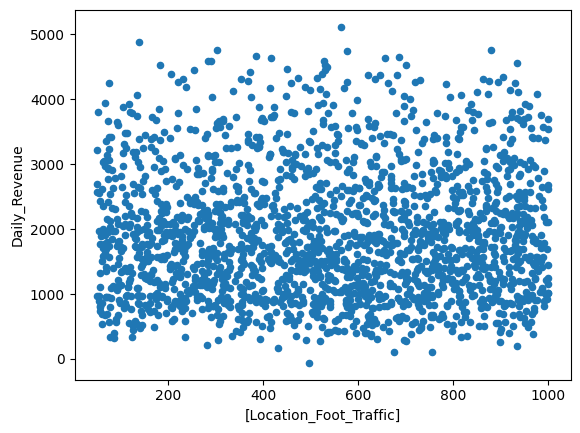

In [56]:
for i, col in enumerate(dtf.columns.values[:-1]):
 dtf.plot(x=[col], y='Daily_Revenue', kind='scatter')
plt.show()

In [57]:
X = dtf.drop(['Daily_Revenue'], axis=1)
y = dtf['Daily_Revenue']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (2000, 6) | y shape: (2000,) 


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [59]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)


In [60]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  328.199
  R2: 0.8921
 Adjusted R2: 0.8905
 Cross Validated R2: 0.8885


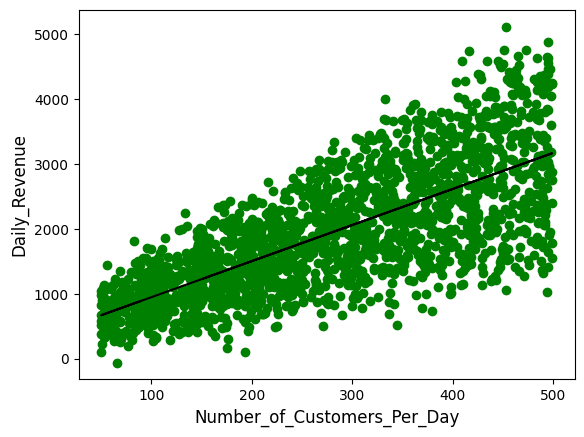

In [61]:
X2 = dtf['Number_of_Customers_Per_Day'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Number_of_Customers_Per_Day', size=12)
plt.show()

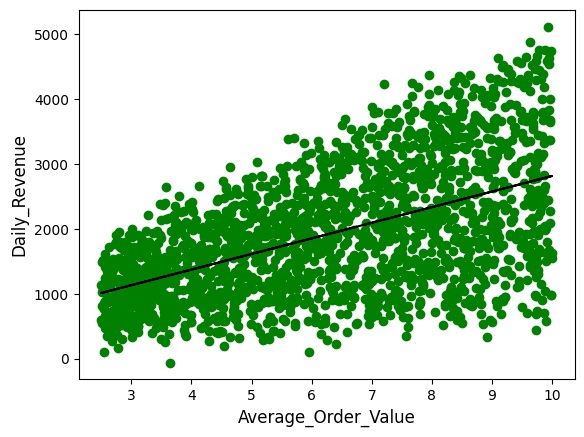

In [62]:
X2 = dtf['Average_Order_Value'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Average_Order_Value', size=12)
plt.show()

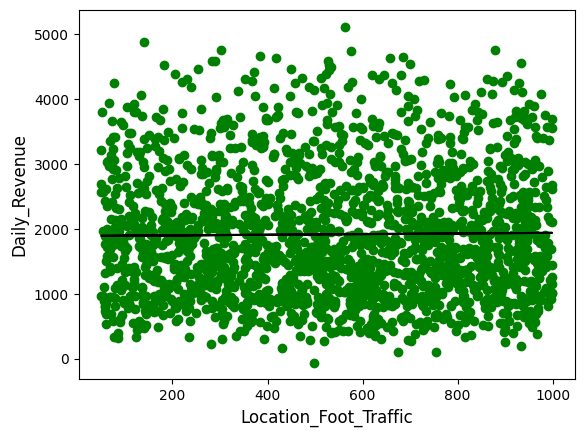

In [63]:
X2 = dtf['Location_Foot_Traffic'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Location_Foot_Traffic', size=12)
plt.show()

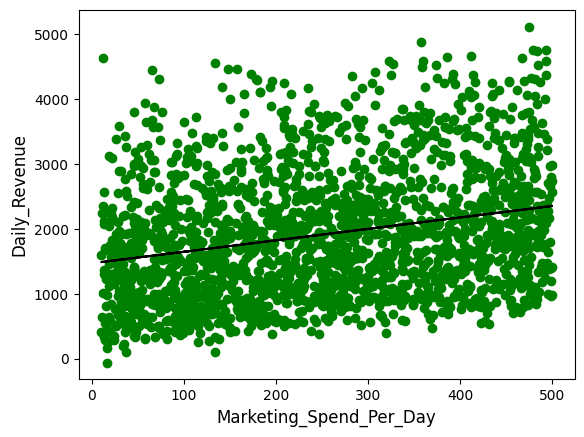

In [64]:
X2 = dtf['Marketing_Spend_Per_Day'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Marketing_Spend_Per_Day', size=12)
plt.show()

In [65]:
from sklearn.tree import DecisionTreeRegressor



# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [66]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  310.9912
  R2: 0.9032
 Adjusted R2: 0.9017
 Cross Validated R2: 0.8818


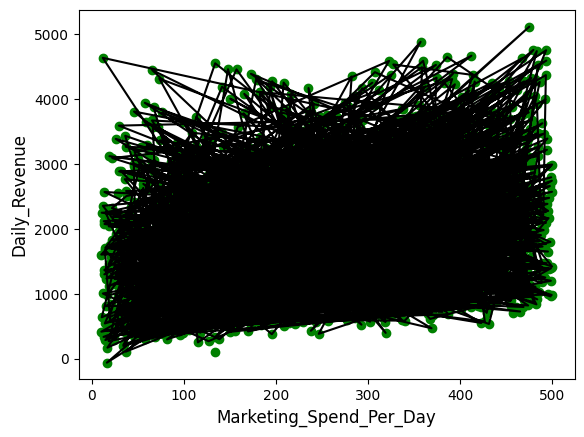

In [69]:
from sklearn.preprocessing import PolynomialFeatures

X2 = dtf['Marketing_Spend_Per_Day'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Marketing_Spend_Per_Day', size=12)
plt.show()

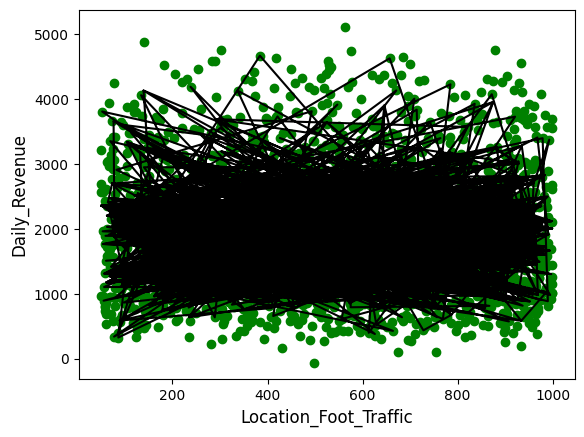

In [70]:
X2 = dtf['Location_Foot_Traffic'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Location_Foot_Traffic', size=12)
plt.show()

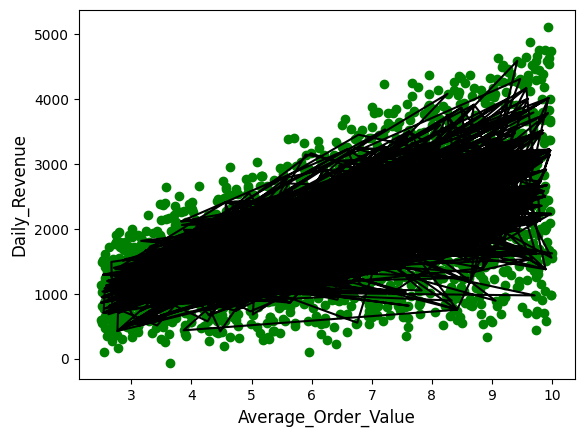

In [71]:
X2 = dtf['Average_Order_Value'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Average_Order_Value', size=12)
plt.show()

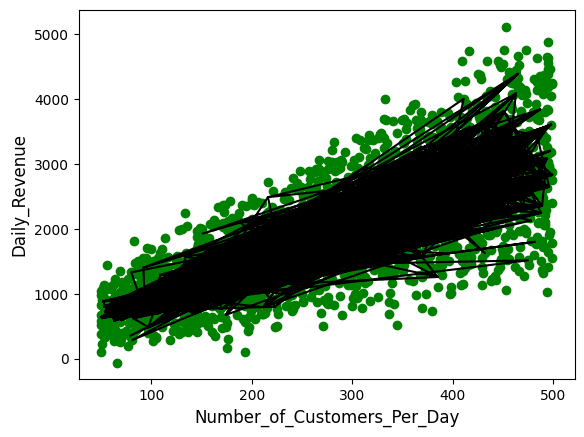

In [72]:
X2 = dtf['Number_of_Customers_Per_Day'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Daily_Revenue'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Daily_Revenue', size=12)
plt.xlabel('Number_of_Customers_Per_Day', size=12)
plt.show()

In [73]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.00001, l1_ratio=0.9)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)


RMSE:  328.199
  R2: 0.8921
 Adjusted R2: 0.8905
 Cross Validated R2: 0.8885


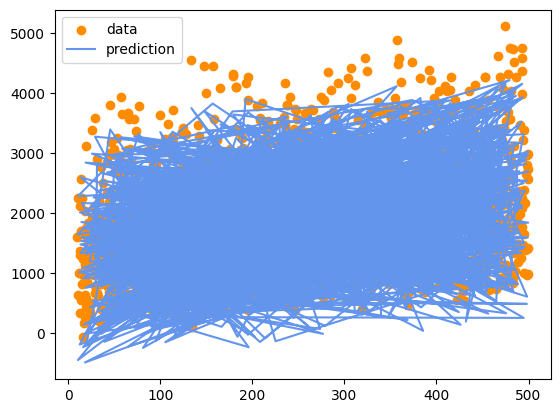

In [74]:
plt.scatter(X_train["Marketing_Spend_Per_Day"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Marketing_Spend_Per_Day"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

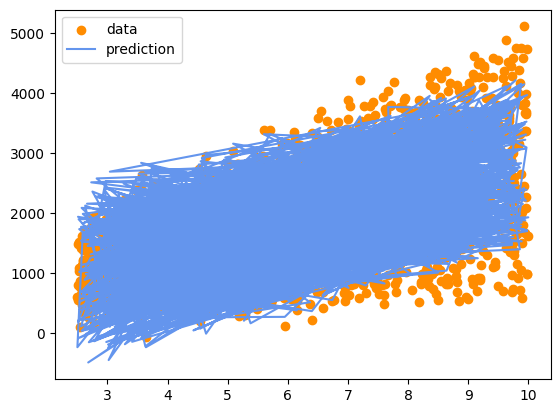

In [75]:
plt.scatter(X_train["Average_Order_Value"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Average_Order_Value"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

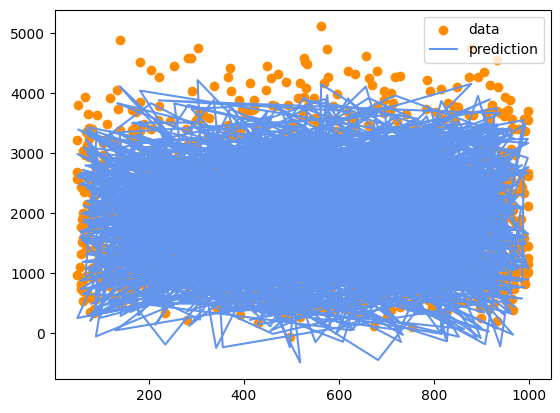

In [76]:
plt.scatter(X_train["Location_Foot_Traffic"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Location_Foot_Traffic"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

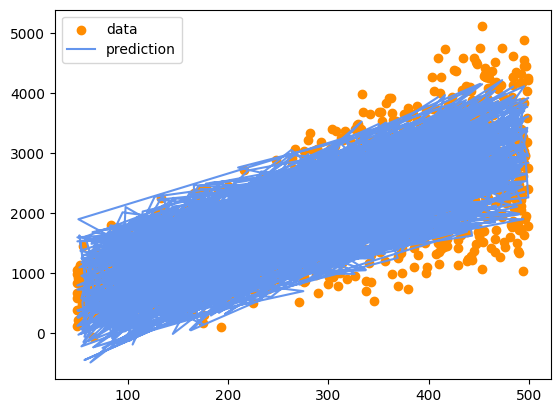

In [78]:
plt.scatter(X_train["Number_of_Customers_Per_Day"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Number_of_Customers_Per_Day"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()